In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt

from test_different_sizes import RESULTS_FULL_PATH

In [2]:
results_path = f"{RESULTS_FULL_PATH}total_results.csv"

results_df = read_csv(results_path)

results_df.head()

,train-after-test,drifts count,after accuracy decrease percentage,after retrain accuracy,before after retrain accuracy,STAT wasted effort,STAT fix accuracy percentage,STAT fix accuracy increase percentage,SFLDT wasted effort,SFLDT fix accuracy percentage,SFLDT fix accuracy increase percentage,STAT_SFLDT wasted effort,STAT_SFLDT fix accuracy percentage,STAT_SFLDT fix accuracy increase percentage
0,0.05-0.75-0.2,163,27.619269,95.824172,95.287658,1.822086,66.937708,9.736723,2.147239,70.867603,13.666618,1.509202,69.329383,12.128398
1,0.1-0.7-0.2,270,26.558007,94.854301,94.725980,2.044444,69.729069,8.699964,1.974074,73.697116,12.668011,1.629630,72.005757,10.976653
2,0.15-0.65-0.2,299,26.793983,94.738066,94.609888,2.217391,71.181691,9.044081,2.521739,74.243424,12.105815,1.705686,74.001823,11.864214
3,0.2-0.6-0.2,330,26.624274,95.092558,94.972268,2.512121,68.777098,6.037630,2.857576,73.809428,11.069959,1.927273,73.012234,10.272766
4,0.25-0.55-0.2,361,26.506022,95.198382,94.489145,2.407202,71.102896,7.203834,3.434903,74.433057,10.533995,1.944598,75.232441,11.333380


In [3]:
sizes_column = results_df["train-after-test"].copy()
retrain_after_accuracy_column = results_df["after retrain accuracy"].copy()
retrain_before_after_accuracy_column = results_df["before after retrain accuracy"].copy()
STAT_accuracy_column = results_df["STAT fix accuracy percentage"].copy()
SFLDT_accuracy_column = results_df["SFLDT fix accuracy percentage"].copy()
STAT_SFLDT_accuracy_column = results_df["STAT_SFLDT fix accuracy percentage"].copy()

In [4]:
for row_index, sizes_string in enumerate(sizes_column):
    train, after, test = sizes_string.split('-')
    sizes_column.iloc[row_index] = float(after) * 100

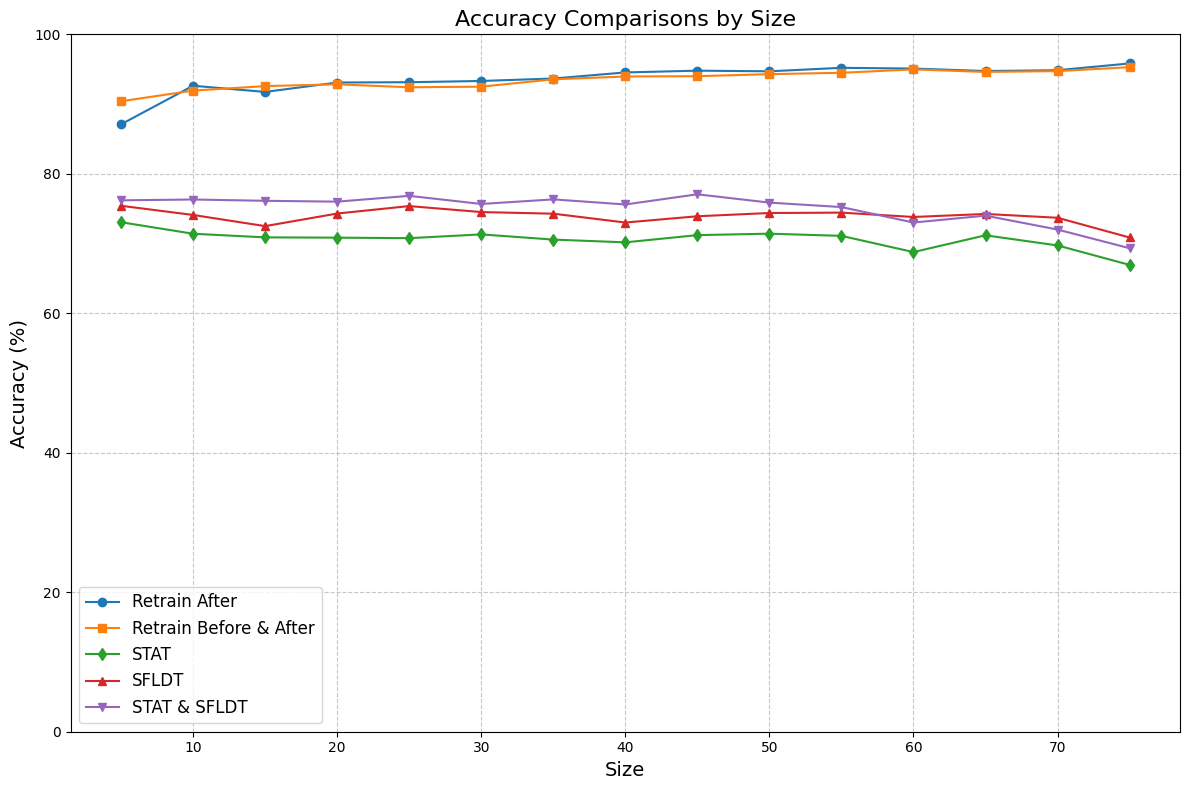

In [6]:
# Plot
plt.figure(figsize=(12, 8))

# Plot each series against sizes_column
plt.plot(sizes_column, retrain_after_accuracy_column, label="Retrain After", marker='o')
plt.plot(sizes_column, retrain_before_after_accuracy_column, label="Retrain Before & After", marker='s')
plt.plot(sizes_column, STAT_accuracy_column, label="STAT", marker='d')
plt.plot(sizes_column, SFLDT_accuracy_column, label="SFLDT", marker='^')
plt.plot(sizes_column, STAT_SFLDT_accuracy_column, label="STAT & SFLDT", marker='v')

# Customize plot
plt.title("Accuracy Comparisons by Size", fontsize=16)
plt.xlabel("Size", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.ylim(0, 100)  # Set y-axis range
plt.legend(fontsize=12, loc='best')
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
